# Data Science for AdWords

In this project we will go over on how to use Data Science to automate and take your AdWords campaign to a whole new level.

As a marketer working for an agency, I hated when we had big clients asking us to create AdWords for their entire website. 
As most of the job was to perform dull and manual entries. So, to make my life easier, more enjoyable and to perform less mistakes, I used my new Data Science skills to automate my work. 

This project will show you, step-by-step, how I did that and how you can do it too. All you need is basic understand of Python and CSS as I will go over with as much detail as possible, so you can apply this project on your work today and impress your boss!


In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import seaborn as sns
from bs4 import BeautifulSoup

sns.set()
%matplotlib inline

In [86]:

# Page with all the instructors
instructors_page = 'https://www.datacamp.com/instructors?all=true'

# CSS class of the link for each instructor
instructor_link_selector = '.instructor-block__description .instructor-block__link' 

# CSS of Instructor's name
instructor_name_selector = '.instructor-block__name'  

In [87]:
instructor_resp = requests.get(instructors_page)

# Get HTML of instructors page
soup = BeautifulSoup(instructor_resp.text, 'lxml')

In [88]:
# By using class link for instructos, we will now use for loop to get each instructors link
instructor_urls = [url['href'] for url in soup.select(instructor_link_selector)]

# Here we use strip to get rid off the white spaces
instructor_names = [name.text.strip() for name in soup.select(instructor_name_selector)]

# Instructor URLs
instructor_urls = ['https://www.datacamp.com' + url for url in instructor_urls]

In [89]:
# Create DataFrame
instructor_df = pd.DataFrame({
    'name': instructor_names,
    'url': instructor_urls
})

# Chek amount of entries - Amount of instructors
print(instructor_df.shape)

instructor_df.head()

(204, 2)


,name,url
0,Filip Schouwenaars,https://www.datacamp.com/instructors/filipsch
1,Jonathan Cornelissen,https://www.datacamp.com/instructors/jonathana...
2,Hugo Bowne-Anderson,https://www.datacamp.com/instructors/hugobowne
3,Nick Carchedi,https://www.datacamp.com/instructors/nickyc
4,Team Anaconda,https://www.datacamp.com/instructors/team-anac...


Now that we have the name of the instructors, we will be using a template to combine each name with a set of keyword related to their specific course topic. 

Variables Explanation:
col_names ---> The list of column names that will be used to enter in Adwords
words ---> The words that we will be combining with the instructor names to generate full keywords / phrases
match types ---> Adwords match type for our keywords. Ex: broad, exact, phrase...

In [90]:
col_names = ['Campaign', 'Ad Group', 'Keyword', 'Criterion Type']
instructor_keywords = []

words = ['course', 'courses', 'learn', 'data science', 'data camp', 'datacamp']
match_types = ['Exact', 'Phrase', 'Broad']

In [91]:
for instructor in instructor_df['name']:
    for word in words:
        for match in match_types:
            if match == 'Broad':
                keyword = '+' + ' +'.join([instructor.replace(' ', ' +').lower(), word])  # modified broach match
            else:
                keyword = instructor.lower() + ' ' + word
            row = ['SEM_Instructors',  # campaign name
                   instructor,  # ad group name
                   keyword, # instructor <keyword>
                   match]  # keyword match type
            instructor_keywords.append(row)


In [92]:
# The same as above, but now, the keyword will come before the instructor's name

for instructor in instructor_df['name']:
    for word in words:
        for match in match_types:
            if match == 'Broad':
                keyword = '+' + ' +'.join([word, instructor.replace(' ', ' +').lower()])
            else:
                keyword = word + ' ' + instructor.lower() 
            row = ['SEM_Instructors',  # campaign name
                   instructor,  # ad group name
                   keyword, # <keyword> instructor 
                   match]  # keyword match type
            instructor_keywords.append(row)


In [93]:
# Create DataFrame

instructor_keywords_df = pd.DataFrame.from_records(instructor_keywords, 
                                                   columns=col_names)

print('total keywords:', instructor_keywords_df.shape[0])
instructor_keywords_df.head()

total keywords: 7344


,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Instructors,Filip Schouwenaars,filip schouwenaars course,Exact
1,SEM_Instructors,Filip Schouwenaars,filip schouwenaars course,Phrase
2,SEM_Instructors,Filip Schouwenaars,+filip +schouwenaars +course,Broad
3,SEM_Instructors,Filip Schouwenaars,filip schouwenaars courses,Exact
4,SEM_Instructors,Filip Schouwenaars,filip schouwenaars courses,Phrase


In [94]:
def generate_keywords(topics, keywords, match_types=['Exact', 'Phrase', 'Broad'],
                     campaign='SEM_Campaign'):
    col_names = ['Campaign', 'Ad Group', 'Keyword', 'Criterion Type']
    campaign_keywords = []

    for topic in topics:
        for word in keywords:
            for match in match_types:
                if match == 'Broad':
                    keyword = '+' + ' +'.join([topic.lower().replace(' ', ' +'), word.replace(' ', ' +')])
                else:
                    keyword = topic.lower() + ' ' + word
                row = [campaign,  # campaign name
                       topic,  # ad group name
                       keyword, # instructor <keyword>
                       match]  # keyword match type
                campaign_keywords.append(row)

    # As done before, we now put words before the topic  
    for topic in topics:
        for word in keywords:
            for match in match_types:
                if match == 'Broad':
                    keyword = '+' + ' +'.join([word.replace(' ', ' +'), topic.lower().replace(' ', ' +')])
                else:
                    keyword = word + ' ' + topic.lower()
                row = [campaign,  # campaign name
                       topic,  # ad group name
                       keyword, # <keyword> instructor
                       match]  # keyword match type
                campaign_keywords.append(row)

    # Create a DataFrame from the lists we have just created.
    return pd.DataFrame.from_records(campaign_keywords, columns=col_names)

In [95]:
topics = ['Data Science', 'Machine Learning']
keywords = ['course', 'tutorial']
generate_keywords(topics, keywords).head(10)

,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Campaign,Data Science,data science course,Exact
1,SEM_Campaign,Data Science,data science course,Phrase
2,SEM_Campaign,Data Science,+data +science +course,Broad
3,SEM_Campaign,Data Science,data science tutorial,Exact
4,SEM_Campaign,Data Science,data science tutorial,Phrase
5,SEM_Campaign,Data Science,+data +science +tutorial,Broad
6,SEM_Campaign,Machine Learning,machine learning course,Exact
7,SEM_Campaign,Machine Learning,machine learning course,Phrase
8,SEM_Campaign,Machine Learning,+machine +learning +course,Broad
9,SEM_Campaign,Machine Learning,machine learning tutorial,Exact


Now, we are going to create relevant topics for each of the segments offered by DataCamp

In [96]:
topics = ['R', 'Python', 'SQL', 'Git', 'Shell']  # listed on the /courses page

# Depending on our strategy, this can be reduced or expanded
keywords = ['data science', 'programming', 'analytics', 'data analysis', 'machine learning',
            'deep learning', 'financial analysis', 'data viz', 'visualization', 'data visualization',
            'learn', 'course', 'courses', 'education', 'data import', 'data cleaning', 
            'data manipulation', 'probability', 'stats', 'statistics', 'course', 'courses',
           'learn', 'education', 'tutorial']  

# Create a dataframe with our new function
tech_keywords = generate_keywords(topics, keywords, campaign='SEM_Technologies')

print('total keywords:', tech_keywords.shape[0])
tech_keywords.head()

total keywords: 750


,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Technologies,R,r data science,Exact
1,SEM_Technologies,R,r data science,Phrase
2,SEM_Technologies,R,+r +data +science,Broad
3,SEM_Technologies,R,r programming,Exact
4,SEM_Technologies,R,r programming,Phrase


### Course Keywords

This is the most specific, and the most relevant of the segments to target people.

Again, we will scrape DataCamp website to get the names and corresponding URLs. The same way we did above for the instructor's campaign.

In [97]:
courses_page = 'https://www.datacamp.com/courses/all'

course_link_selector = '.courses__explore-list .course-block'

course_resp = requests.get(courses_page)
soup = BeautifulSoup(course_resp.text, 'lxml')

# Course link content
course_urls = [link.contents[1]['href'] for link in soup.select(course_link_selector)] 

# Creating course urls
course_urls = ['https://www.datacamp.com' + url for url in course_urls]

# Course Names
course_names = [link.h4.text for link in soup.select(course_link_selector)]

In [98]:
# Create DataFrame
course_df = pd.DataFrame({
    'name': course_names,
    'url': course_urls
})

# Here we are cleaning the names from any special characters with Regex
course_df['name_clean'] = course_df.name.str.replace('[^a-zA-Z0-9]', ' ').str.strip()  # remove (part x)

print('total keywords:', course_df.shape[0])
course_df.head()

total keywords: 247


,name,url,name_clean
0,Introduction to R,https://www.datacamp.com/courses/free-introduc...,Introduction to R
1,"Data Analysis in R, the data.table Way",https://www.datacamp.com/courses/data-table-da...,Data Analysis in R the data table Way
2,Data Manipulation in R with dplyr,https://www.datacamp.com/courses/dplyr-data-ma...,Data Manipulation in R with dplyr
3,Data Visualization in R with ggvis,https://www.datacamp.com/courses/ggvis-data-vi...,Data Visualization in R with ggvis
4,Reporting with R Markdown,https://www.datacamp.com/courses/reporting-wit...,Reporting with R Markdown


To generate keywords for the courses, we need to be careful, as it is not exactly what people would be looking for on Google. The following should be good enough for a start. Since some of the course names are quite long, we will be using just the course names, without adding any other qualifier, and that's why we will have an empty string in our list.

In [99]:
keywords = ['', 'learn', 'course', 'courses', 'tutorial', 'education']

course_keywords = generate_keywords(course_df['name_clean'], keywords, campaign='SEM_Courses')

print('total keywords:', course_keywords.shape[0])
course_keywords.head(10)

total keywords: 8892


,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Courses,Introduction to R,introduction to r,Exact
1,SEM_Courses,Introduction to R,introduction to r,Phrase
2,SEM_Courses,Introduction to R,+introduction +to +r +,Broad
3,SEM_Courses,Introduction to R,introduction to r learn,Exact
4,SEM_Courses,Introduction to R,introduction to r learn,Phrase
5,SEM_Courses,Introduction to R,+introduction +to +r +learn,Broad
6,SEM_Courses,Introduction to R,introduction to r course,Exact
7,SEM_Courses,Introduction to R,introduction to r course,Phrase
8,SEM_Courses,Introduction to R,+introduction +to +r +course,Broad
9,SEM_Courses,Introduction to R,introduction to r courses,Exact


### Keywords for Topics

#### Skills

In [100]:
# URL with all the skills available in DataCamp
skills_page = 'https://www.datacamp.com/tracks/skill'

# CSS class that we want to target
skills_link_selector = 'article a.shim'

skills_resp = requests.get(skills_page)
skill_soup = BeautifulSoup(skills_resp.text, 'lxml')

In [101]:
# URL for each topic
skills_urls = [link['href'] for link in skill_soup.select(skills_link_selector)] 

# Topic Name
skills_names = [skill.replace('/tracks/', '').replace('-', ' ') for skill in skills_urls]

# Full URL
skills_urls = ['https://www.datacamp.com' + url for url in skills_urls]

#### Careers

In [102]:
# URL with all the Career tracks
career_page = 'https://www.datacamp.com/tracks/career'

# Class selector
career_link_selector = 'article a.shim'

career_resp = requests.get(career_page)
career_soup = BeautifulSoup(career_resp.text, 'lxml')

In [103]:
# URL for career tracks
career_urls = [link['href'] for link in career_soup.select(career_link_selector)] 

# Career Track Names
career_names = [career.replace('/tracks/', '').replace('-', ' ') for career in career_urls]

# Full URL
career_urls = ['https://www.datacamp.com' + url for url in career_urls]

In [104]:
# DataFrame for the career track keywords
tracks_df = pd.DataFrame({
    'name': skills_names + career_names,
    'url': skills_urls + career_urls
})

# Using title to replace lower cases with Upper case (first letter of each word only)
tracks_df['name'] = [x.title() for x in tracks_df['name']]
tracks_df.head()

,name,url
0,R Programming,https://www.datacamp.com/tracks/r-programming
1,Importing Cleaning Data With R,https://www.datacamp.com/tracks/importing-clea...
2,Data Manipulation With R,https://www.datacamp.com/tracks/data-manipulat...
3,Python Programming,https://www.datacamp.com/tracks/python-program...
4,Importing Cleaning Data With Python,https://www.datacamp.com/tracks/importing-clea...


In [105]:
# Generate Keywords for eeach career track title
tracks_keywords = generate_keywords(tracks_df['name'], keywords, campaign='SEM_Tracks')

print('total keywords:', tracks_keywords.shape[0])
tracks_keywords.head()

total keywords: 1944


,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Tracks,R Programming,r programming,Exact
1,SEM_Tracks,R Programming,r programming,Phrase
2,SEM_Tracks,R Programming,+r +programming +,Broad
3,SEM_Tracks,R Programming,r programming learn,Exact
4,SEM_Tracks,R Programming,r programming learn,Phrase


Now, we will concatenate all keywords that are listed in instructor_keywords, tech_keywords, course_keywords, and tracks_keywords so that they are together in one DataFrame

In [106]:
full_keywords_df = pd.concat([instructor_keywords_df, tech_keywords, course_keywords, tracks_keywords])
print('total keywords:', full_keywords_df.shape[0])
print('total campaigns:', len(set(full_keywords_df['Campaign'])))
print('total ad groups:', len(set(full_keywords_df['Ad Group'])))
full_keywords_df.to_csv('keywords.csv', index=False)
full_keywords_df.head()

total keywords: 18930
total campaigns: 4
total ad groups: 481


,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Instructors,Filip Schouwenaars,filip schouwenaars course,Exact
1,SEM_Instructors,Filip Schouwenaars,filip schouwenaars course,Phrase
2,SEM_Instructors,Filip Schouwenaars,+filip +schouwenaars +course,Broad
3,SEM_Instructors,Filip Schouwenaars,filip schouwenaars courses,Exact
4,SEM_Instructors,Filip Schouwenaars,filip schouwenaars courses,Phrase


Cool! Now, we are good to go with our keywords. Next step is ads.

So, Let's create some ads text!

## Ads | Copy Writing

Before proceeding, let's see what we have first:
- Campaigns and ad group names
- The ad group name and the corresponding URL 

With this information, we can create the following plan:
- 1- Create ad templates to use (2-3 should be food to start with)
- 2- Create a campaign column and add it to the ('name', 'url') DataFrames
- 3- Merge all the ('name', 'url') DataFrames into one big DataFrame
- 4- Create ads for all ad groups; this consists of the following fields for each ad:
    - Headline 1 - Max 30 characters
    - Headline 2 - Max 30 characters
    - Display URL; automatically inferred from the final URL
    - Final URL: the full path where the user will end up (has to be the same domain as the display URL)
- 5- Make sure the work is consistent with the keywords DataFrame
- 6- Upload and launch campaigns

### Ad Templates

One thing to note here is that we need to be careful with the length of our fields.

As we seen above, some of the course names are lengthy and the topics vary a lot. So, we need to analize it first and see what can do about it.

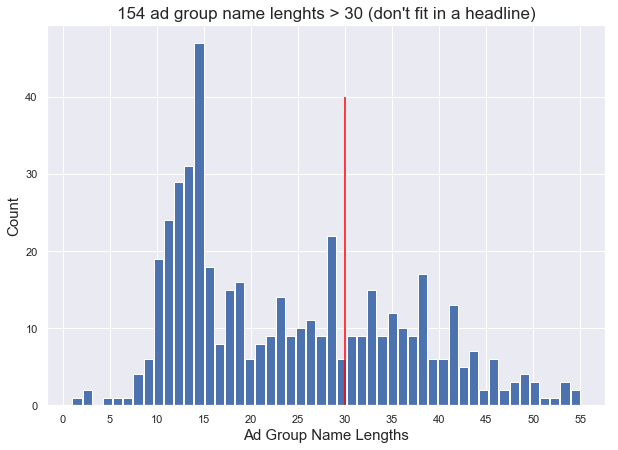

In [128]:
# Check amount of unique of ad groups and length of each
adgroup_lengths = pd.Series([len(adgrp) for adgrp in full_keywords_df['Ad Group'].unique()])

# Select all the ad groups that have length more than 30
long_adgroups = sum(adgroup_lengths > 30)
plt.figure(figsize=(10,7))
plt.hist(adgroup_lengths, rwidth=0.9, bins=50)
plt.vlines(x=30, ymin=0, ymax=40, colors='red')
plt.title(str(long_adgroups) + ' ad group name lenghts > 30 (don\'t fit in a headline)',  fontsize=17)
plt.xlabel('Ad Group Name Lengths', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(range(0, 60, 5))
plt.show()

So, it seems that our problem is not very straightforward as we need to deal with 154 strings that are larger than 30 and it won't fit in the headline.

For different cases, we will need to apply different strategies when dealing with situations like this. In this case, what we are going to do is to split the name into two phrases, each containing at most 30 characters.

Although, not very suitable, it works well in this case. 

In [134]:
def split_string(string, splits=2, max_len=60):
    """Split `string` into `splits` words, each shorter than `max_len` / `splits`"""
    if len(string) < max_len / splits: # If string less than 30 we will just return the string and an empty string
        return string, ''
    str_words = string.split(' ') # If not, we will split every word
    result = ''
    for i, word in enumerate(str_words):
        if len(result + ' ' + word) <= max_len / splits: # If result (the new string) + word smaller than 30
            result += word + ' ' # Add word to string
        else:
            break # if longer than 30 stops
    spaces = result.strip().count(' ') # Strip removes white space in the beginning or end of string
    result2 = string[string[len(result):].index(word) + len(result):] # Get all the words after the last word in result
    return result.strip(), result2

In [135]:
print(split_string('this is a very long course name that needs splitting', 2, 60))
print(split_string('short course name', 2, 60))


('this is a very long course', 'name that needs splitting')
('short course name', '')


Now, let's think about the template we want to have.

A general template for an ad should usually consist witht the following:
- Product: If I am searching for a "Data Science course" on Google, for an ad to get my attention I need to see 'data science course' in the link / ads somehwere.
- Benefits: This is the emotional/psychological part that people are really after, beyond just completing course, think of ways that the product/service will benefit them, 'boost your career', 'stand out from the crowd!'
- Features: Now that we have promised the client a bunch of cool things, we have to show them how to get there. For example, '100 data science courses', 'learn from top experts', 'get instant feedback on your coding skills'
- Call to action: Right on! You have motivated him/her to purchase the product/service and showed them how they will get there. You go them! But, now what? Show them the way - 'sign up for a free trial', 'sample first chapters for free', 'save 20% on annual subscription'

It's not easy to put all of them together, as it might get quite long. So, we have to be careful.

Headline 1: This will always contain the name of the course (or the first half)
Headline 2: THe second half of the course name of one of the following:
    - Boost your Data Science Career
    - Stand Our From the Crowd
    - Tackle Complex Questions
Description: Each ad group will have the three variations below and they will rotate
    - Learn Directly From the Top Experts in the Field. 20% off Annual Subscriptions
    - Get Ahead of the Curve, Master Data Science Skills. $29/Month. Cancel Anytime
    - Chhose From a Wide Variety of Topics Taught by the Best in the World. Start Now

### Create Campaigns Columns

In [138]:
# Just to make sure you have consistent naming conventions
full_keywords_df.Campaign.unique()  

array(['SEM_Instructors', 'SEM_Technologies', 'SEM_Courses', 'SEM_Tracks'],
      dtype=object)

In [141]:
# Name the campaign 
course_df['Campaign'] = 'SEM_Courses'

# Rename columns
course_df = course_df.rename(columns={'name_clean': 'name', 'name': 'old_name'})

course_df.head()

,old_name,url,name,Campaign
0,Introduction to R,https://www.datacamp.com/courses/free-introduc...,Introduction to R,SEM_Courses
1,"Data Analysis in R, the data.table Way",https://www.datacamp.com/courses/data-table-da...,Data Analysis in R the data table Way,SEM_Courses
2,Data Manipulation in R with dplyr,https://www.datacamp.com/courses/dplyr-data-ma...,Data Manipulation in R with dplyr,SEM_Courses
3,Data Visualization in R with ggvis,https://www.datacamp.com/courses/ggvis-data-vi...,Data Visualization in R with ggvis,SEM_Courses
4,Reporting with R Markdown,https://www.datacamp.com/courses/reporting-wit...,Reporting with R Markdown,SEM_Courses


In [142]:
# Name the Campaign
instructor_df['Campaign'] = 'SEM_Instructors'

instructor_df.head()

,name,url,Campaign
0,Filip Schouwenaars,https://www.datacamp.com/instructors/filipsch,SEM_Instructors
1,Jonathan Cornelissen,https://www.datacamp.com/instructors/jonathana...,SEM_Instructors
2,Hugo Bowne-Anderson,https://www.datacamp.com/instructors/hugobowne,SEM_Instructors
3,Nick Carchedi,https://www.datacamp.com/instructors/nickyc,SEM_Instructors
4,Team Anaconda,https://www.datacamp.com/instructors/team-anac...,SEM_Instructors


In [143]:
tracks_df['Campaign'] = 'SEM_Tracks'

tracks_df.head()

,name,url,Campaign
0,R Programming,https://www.datacamp.com/tracks/r-programming,SEM_Tracks
1,Importing Cleaning Data With R,https://www.datacamp.com/tracks/importing-clea...,SEM_Tracks
2,Data Manipulation With R,https://www.datacamp.com/tracks/data-manipulat...,SEM_Tracks
3,Python Programming,https://www.datacamp.com/tracks/python-program...,SEM_Tracks
4,Importing Cleaning Data With Python,https://www.datacamp.com/tracks/importing-clea...,SEM_Tracks


In [145]:
# Languages taught in DataCamp

# URL 
tech_domain = 'https://www.datacamp.com/courses/tech:'
tech_domain_list = []

# Completing the URL with a specific language
for tech in ['R', 'Python', 'SQL', 'Git', 'Shell']:
    tech_domain_list.append((tech, tech_domain + tech))
    
tech_df = pd.DataFrame.from_records(tech_domain_list, columns=['name', 'url'])
tech_df['Campaign'] = 'SEM_Technologies'
tech_df

,name,url,Campaign
0,R,https://www.datacamp.com/courses/tech:R,SEM_Technologies
1,Python,https://www.datacamp.com/courses/tech:Python,SEM_Technologies
2,SQL,https://www.datacamp.com/courses/tech:SQL,SEM_Technologies
3,Git,https://www.datacamp.com/courses/tech:Git,SEM_Technologies
4,Shell,https://www.datacamp.com/courses/tech:Shell,SEM_Technologies


### Merge All ('name', 'url') DataFrames

In [150]:
# Concatenate all DataFrames together
full_ads_df = pd.concat([course_df[['Campaign', 'name', 'url']], # Here, we exclude old_name column
                        instructor_df,
                        tracks_df,
                        tech_df], ignore_index=True)

# Rename Columns
full_ads_df = full_ads_df.rename(columns={'name': 'Ad Group', 'url': 'Final URL'})


print('total rows:', full_ads_df.shape[0])

# Count the total amount of entries we currently have
n_adgroups = full_ads_df.shape[0]
full_ads_df.head()

total rows: 510


/Users/joaobecker/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,Campaign,Ad Group,Final URL
0,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...
1,SEM_Courses,Data Analysis in R the data table Way,https://www.datacamp.com/courses/data-table-da...
2,SEM_Courses,Data Manipulation in R with dplyr,https://www.datacamp.com/courses/dplyr-data-ma...
3,SEM_Courses,Data Visualization in R with ggvis,https://www.datacamp.com/courses/ggvis-data-vi...
4,SEM_Courses,Reporting with R Markdown,https://www.datacamp.com/courses/reporting-wit...


### Generate Ads

Now, we have the ads DataFrame that constins Campaign, Ad Group, and Final URL. All we need to do is to add Headline 1, Headline 2, and Description Fields.

For testing purposes, we are goign to create three ad variations. To see which gets better click through rate and conversion rate.

In [165]:
# Since, we are creating three ad variations. Let's extend our DataFrame 3X.

full_ads_df = full_ads_df.iloc[[x  for x in range(n_adgroups) for i in range(3)], :] 

print('total rows:', full_ads_df.shape[0])
full_ads_df.head(9)

total rows: 1530


,Campaign,Ad Group,Final URL
0,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...
0,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...
0,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...
1,SEM_Courses,Data Analysis in R the data table Way,https://www.datacamp.com/courses/data-table-da...
1,SEM_Courses,Data Analysis in R the data table Way,https://www.datacamp.com/courses/data-table-da...
1,SEM_Courses,Data Analysis in R the data table Way,https://www.datacamp.com/courses/data-table-da...
2,SEM_Courses,Data Manipulation in R with dplyr,https://www.datacamp.com/courses/dplyr-data-ma...
2,SEM_Courses,Data Manipulation in R with dplyr,https://www.datacamp.com/courses/dplyr-data-ma...
2,SEM_Courses,Data Manipulation in R with dplyr,https://www.datacamp.com/courses/dplyr-data-ma...


Now, let's add the description

In [169]:
# The 3 different descriptions we are going to be using for each keyword
Description = [
    'Learn Directly From the Top Experts in the Field. 20% off Annual Subcriptions',
    'Be Ahead of the Curve, Master Data Science Skills. $29 / Month. Cancel Anytime',
    'Choose From a Wide Variety of Topics Tuaght by the Best in the World. Start Now'   
]

# Creating the right amount of description
Description = [x for i in range(n_adgroups) for x in Description]

# Insert the descriptions in our DataFrame
full_ads_df['Description'] = Description
full_ads_df.head()

,Campaign,Ad Group,Final URL,Description
0,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,Learn Directly From the Top Experts in the Fie...
0,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,"Be Ahead of the Curve, Master Data Science Ski..."
0,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,Choose From a Wide Variety of Topics Tuaght by...
1,SEM_Courses,Data Analysis in R the data table Way,https://www.datacamp.com/courses/data-table-da...,Learn Directly From the Top Experts in the Fie...
1,SEM_Courses,Data Analysis in R the data table Way,https://www.datacamp.com/courses/data-table-da...,"Be Ahead of the Curve, Master Data Science Ski..."


Next, we will add the Headline 1 and Headline 2.

In [170]:
# Headline 2 - In case the length of the ad group is 30 or less. 
benefits = [
    'Boost Your Data Science Career',
    'Stand Out From the Crowd',
    'Tackle Complex Questions'    
]

In [173]:
# Create benefits for all the entries
benefits = [x for i in range(n_adgroups) for x in benefits]

# Apply split string function to split phrases with more than 30 char.
headlines = [split_string(x) for x in full_ads_df['Ad Group']]

# Add to headline 1 the first of the split
full_ads_df['Headline 1'] = [x[0] for x in headlines]

# If the split was longer than 30, add the rest to the second headline. If not, add the benefits
full_ads_df['Headline 2'] = [x[1] if x[1] else benefits[i] for i, x in enumerate(headlines)]

print('total ads:', full_ads_df.shape[0])
full_ads_df.head(9)

total ads: 1530


,Campaign,Ad Group,Final URL,Description,Headline 1,Headline 2
0,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,Learn Directly From the Top Experts in the Fie...,Introduction to R,Boost Your Data Science Career
0,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,"Be Ahead of the Curve, Master Data Science Ski...",Introduction to R,Stand Out From the Crowd
0,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,Choose From a Wide Variety of Topics Tuaght by...,Introduction to R,Tackle Complex Questions
1,SEM_Courses,Data Analysis in R the data table Way,https://www.datacamp.com/courses/data-table-da...,Learn Directly From the Top Experts in the Fie...,Data Analysis in R the data,table Way
1,SEM_Courses,Data Analysis in R the data table Way,https://www.datacamp.com/courses/data-table-da...,"Be Ahead of the Curve, Master Data Science Ski...",Data Analysis in R the data,table Way
1,SEM_Courses,Data Analysis in R the data table Way,https://www.datacamp.com/courses/data-table-da...,Choose From a Wide Variety of Topics Tuaght by...,Data Analysis in R the data,table Way
2,SEM_Courses,Data Manipulation in R with dplyr,https://www.datacamp.com/courses/dplyr-data-ma...,Learn Directly From the Top Experts in the Fie...,Data Manipulation in R with,dplyr
2,SEM_Courses,Data Manipulation in R with dplyr,https://www.datacamp.com/courses/dplyr-data-ma...,"Be Ahead of the Curve, Master Data Science Ski...",Data Manipulation in R with,dplyr
2,SEM_Courses,Data Manipulation in R with dplyr,https://www.datacamp.com/courses/dplyr-data-ma...,Choose From a Wide Variety of Topics Tuaght by...,Data Manipulation in R with,dplyr


### Double Check

Here, we will just make syre that all campaigns and ad groups in both DataFrames are the same.

In [177]:
ads_check = (full_ads_df[['Campaign', 'Ad Group']]
             .drop_duplicates() # Drop duplicates
             .sort_values(['Campaign', 'Ad Group']) # Sort values by ad group name ascending
             .reset_index(drop=True)) 


keywords_check = (full_keywords_df[['Campaign', 'Ad Group']]
                  .drop_duplicates()
                  .sort_values(['Campaign', 'Ad Group'])
                  .reset_index(drop=True))

# Check if both DataFrames are the same
all(ads_check == keywords_check)

True

### Save & Launch
- Now we can save it CSV and use the AdWords editor to upload our newly created campaign. :D

In [178]:
full_ads_df.to_csv('DataCamp_ads.csv', index=False)